In [49]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, RegexpTokenizer
import re 
import string

In [50]:
from google.colab import drive
drive.mount('/content/drive') 
%cd drive/MyDrive/'CSCI 535 Project'/Implementation/training_models/ 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/CSCI 535 Project/Implementation/training_models/'
/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models


In [52]:
reddit = pd.read_csv('./data/reddit_data/train.csv')
ami = pd.read_csv('./data/ami_data/ami_train.csv') 

In [53]:
def plot_barplots(x, y, x_label, y_label, title_plot):
  plt.bar(x, y, width=0.2)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title_plot)
  plt.show() 


def comparable_bar_plots(x1, x2, x_label, y_label, title, comparable_quants=1): 
  index = np.arange(comparable_quants)
  bar_width = 0.35
  fig, ax = plt.subplots()
  reddit = ax.bar(index, x2['label'].value_counts(), bar_width, 
                label="Ami")

  ami = ax.bar(index+bar_width, x1['label'].value_counts(),
                 bar_width, label="Reddit")
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.set_title(title)
  ax.set_xticks(index + bar_width / 2)
  ax.set_xticklabels(["Non-misogynistic", "Misogynistic"])
  ax.legend()

  plt.show()

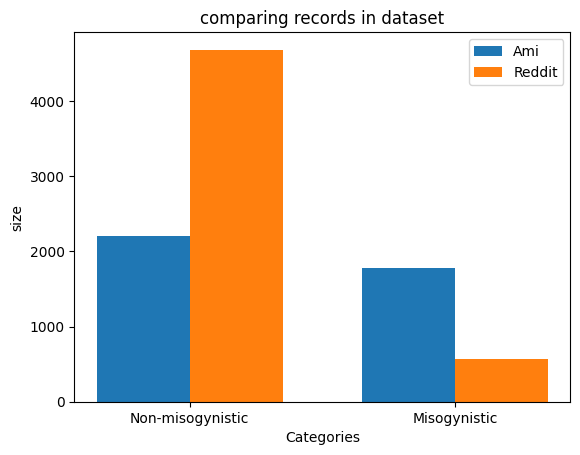

In [54]:
comparable_bar_plots(reddit, ami, 'Categories', 'size', 'comparing records in dataset', comparable_quants=2)

splitting the datasets based on the splits

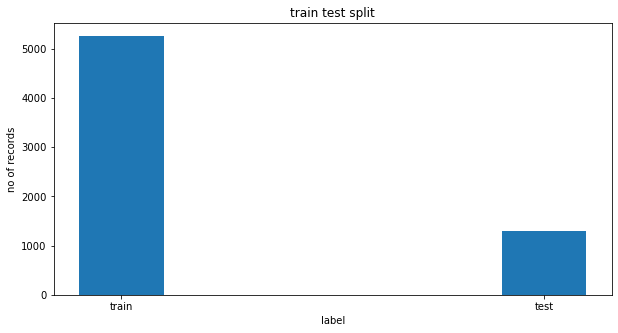

{'train': 5264, 'test': 1303}


In [ ]:
train_data = dataset[dataset['split']=='train']
test_data = dataset[dataset['split']=='test'] 

stats_train_test = {'train': len(train_data), 'test':len(test_data)}
fig = plt.figure(figsize = (10, 5))
 
plot_barplots(stats_train_test.keys(), stats_train_test.values(), 'label', 'no of records', 'train test split')
print(stats_train_test)

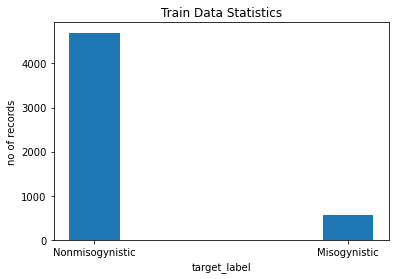

train data statistics {'Nonmisogynistic': 4694, 'Misogynistic': 570}


In [ ]:
train_stats = train_data['level_1'].value_counts().to_dict()
test_stats = test_data['level_1'].value_counts().to_dict() 

plot_barplots(train_stats.keys(), train_stats.values(), 'target_label', 'no of records', 'Train Data Statistics') 
print("train data statistics", train_stats)


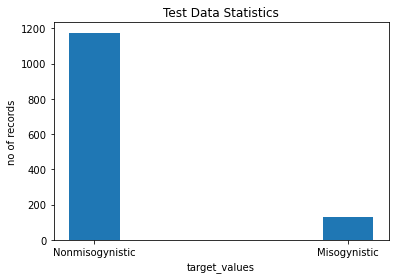

test data statistics {'Nonmisogynistic': 1174, 'Misogynistic': 129}


In [ ]:
plot_barplots(test_stats.keys(), test_stats.values(), 'target_values', 'no of records', 'Test Data Statistics') 
print("test data statistics", test_stats)


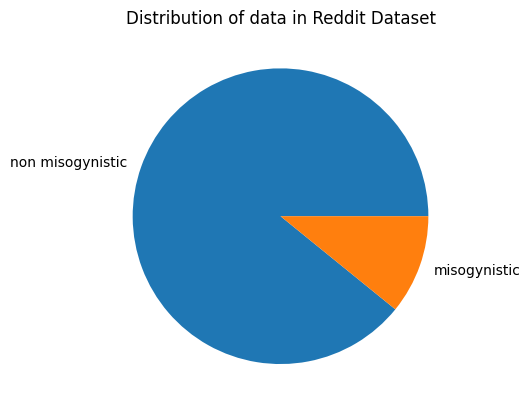

In [77]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(list(reddit['label'].value_counts()))
mylabels = ["non misogynistic", "misogynistic"]
#myexplode = [0.2, 0, 0, 0]
plt.title('Distribution of data in Reddit Dataset')
plt.pie(y, labels = mylabels)
plt.show() 

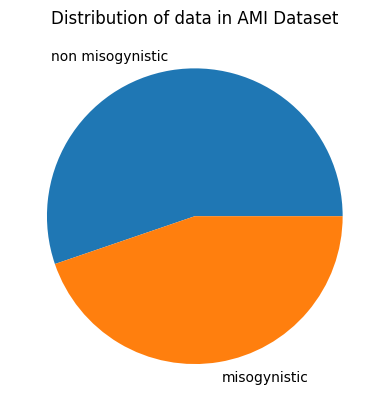

In [78]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(list(ami['label'].value_counts()))
mylabels = ["non misogynistic", "misogynistic"]
#myexplode = [0.2, 0, 0, 0]
plt.title('Distribution of data in AMI Dataset')
plt.pie(y, labels = mylabels)
plt.show() 

In [79]:
ami['label'].value_counts()

0    2202
1    1784
Name: label, dtype: int64

#### Cleaning the dataset 

In [ ]:
def clean_text(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):

    tokenizer = RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [ ]:
train_data['clean_data_1'] = train_data['text'].apply(str).apply(lambda x: text_preprocessing(x))
test_data['clean_data_1'] = test_data['text'].apply(str).apply(lambda x: text_preprocessing(x))

/var/folders/0n/ppppx7b17rld400dg06l4xw00000gn/T/ipykernel_75411/491321068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['clean_data_1'] = train_data['body'].apply(str).apply(lambda x: text_preprocessing(x))
/var/folders/0n/ppppx7b17rld400dg06l4xw00000gn/T/ipykernel_75411/491321068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['clean_data_1'] = test_data['body'].apply(str).apply(lambda x: text_preprocessing(x))


#### Saving the Cleaned and Updated dataset

In [ ]:
train_data.to_csv('reddit_data/cleaned_dataset/train_data.csv')
test_data.to_csv('reddit_data/cleaned_dataset/test_data.csv') 

#### Wordcloud Analysis into the dataset

In [ ]:
misogynistic_statements = train_data[ train_data['level_1'] == 'Misogynistic']['text_clean'].to_list() + test_data[ test_data['level_1'] == 'Misogynistic']['text_clean'].to_list()
nonmisogynistic_statements = train_data[ train_data['level_1'] == 'Nonmisogynistic']['text_clean'].to_list()+ test_data[ test_data['level_1'] == 'Nonmisogynistic']['text_clean'].to_list()

In [ ]:
def create_wordcloud(statements, title_given): 

  unique_string=(" ").join(statements)
  wordcloud = WordCloud(background_color='white', width = 1000, height = 500).generate(unique_string)
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(title_given)
  plt.show()


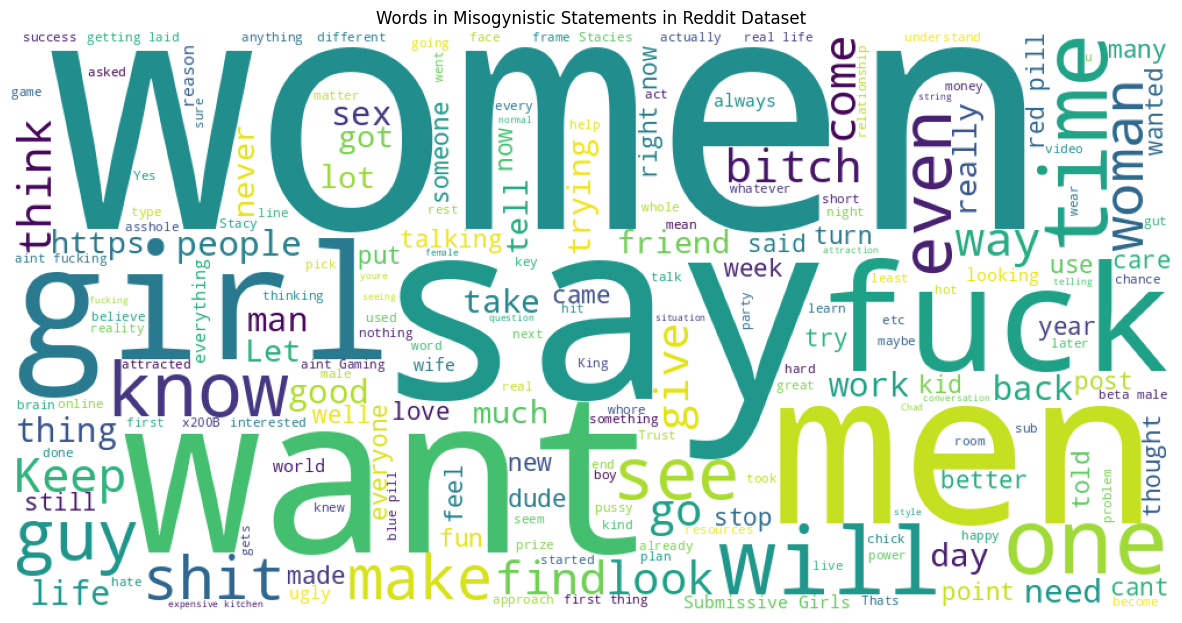

In [ ]:
create_wordcloud(reddit[reddit['label']==1]['text'], 'Words in Misogynistic Statements in Reddit Dataset')

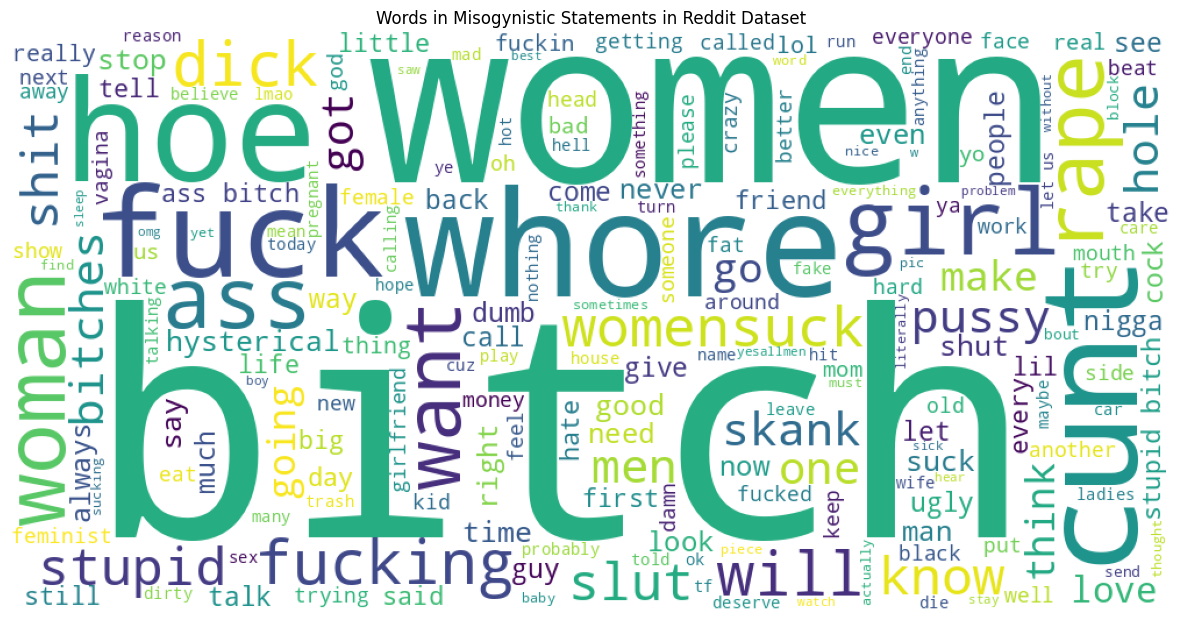

In [ ]:
create_wordcloud(ami[ami['label']==1]['text'], 'Words in Misogynistic Statements in Reddit Dataset')

#### <b>Observation</b> 
Similar corpus of words. Maybe there s a difference in the way the statements are phrased? 


In [ ]:
def count_words(string): 
  tokenized_string = word_tokenize(string) 
  #unique_words = list(tokenized_string)) 
  return len(tokenized_string) 


In [ ]:
reddit_data = reddit[ reddit['label']==1]['text'].apply(lambda x: len(str(x).split()))
ami_data = ami[ ami['label']==1]['text'].apply(lambda x: len(str(x).split()))

In [ ]:
misogynistic_word_count = train_data[train_data['level_1']=='Misogynistic']['text_word_count'] 
non_misogynistic_word_count = train_data[train_data['level_1']=='Nonmisogynistic']['text_word_count'] 


In [ ]:
max(reddit_data)

2091

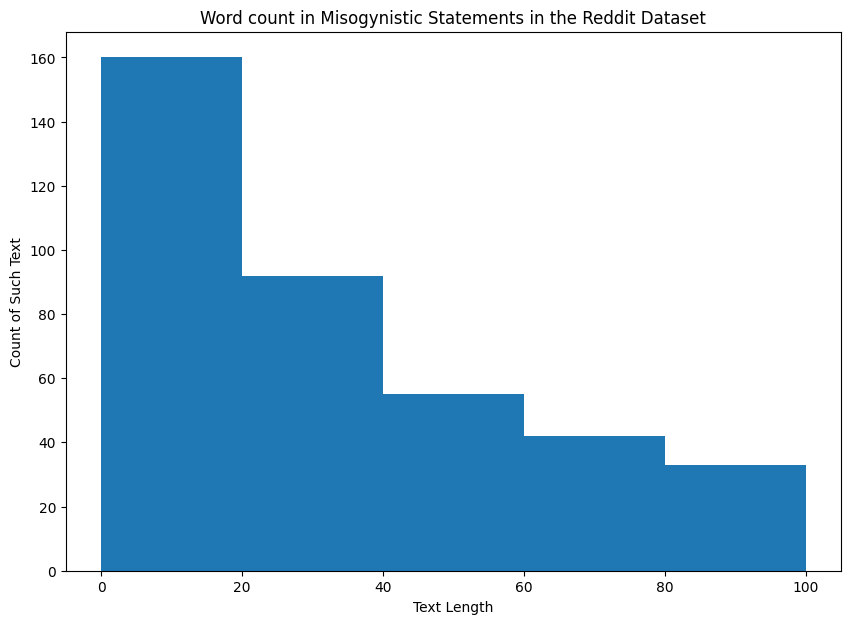

In [55]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(reddit_data, bins = [0,  20,  40, 60, 80, 100])
plt.xlabel('Text Length') 
plt.ylabel('Count of Such Text')
plt.title('Word count in Misogynistic Statements in the Reddit Dataset')
plt.show()

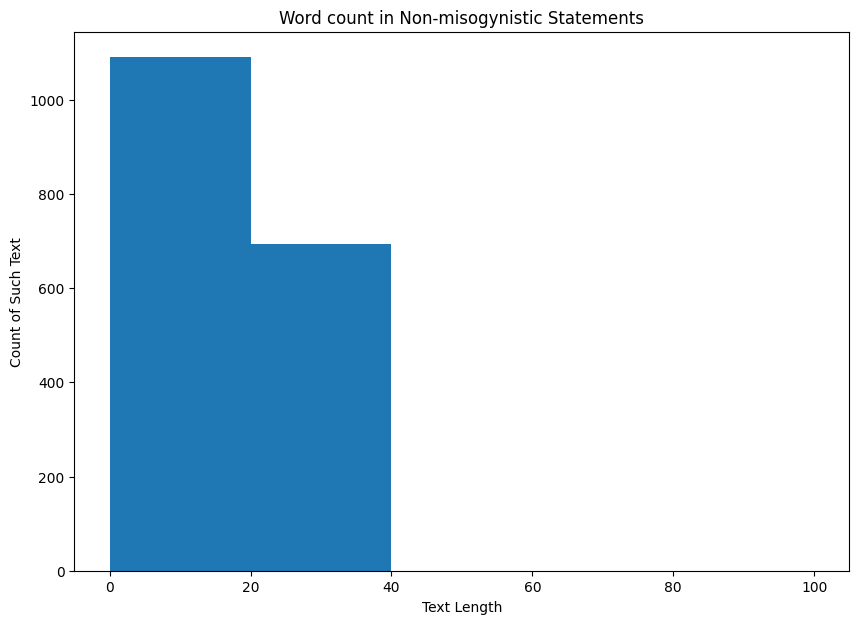

In [56]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(ami_data, bins = [0, 20, 40, 60, 80,100])
plt.xlabel('Text Length') 
plt.ylabel('Count of Such Text')
plt.title('Word count in Non-misogynistic Statements')
plt.show()

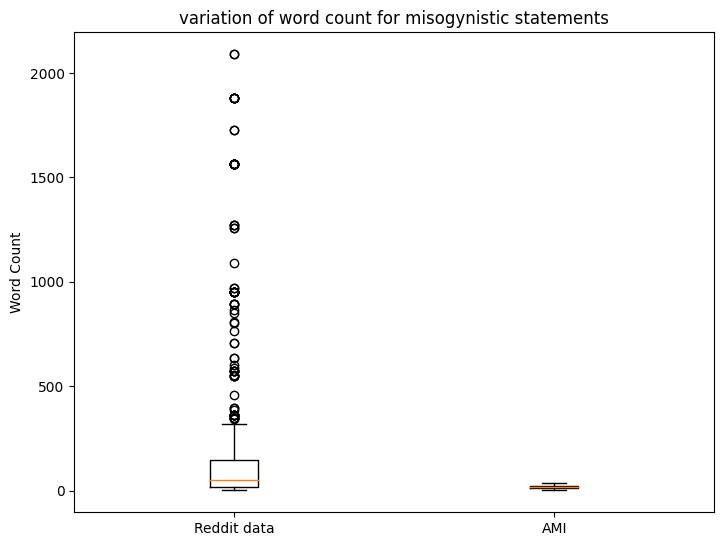

In [64]:
data_to_plot = [reddit_data, ami_data]

# Create a figure instance
fig = plt.figure()
labels = ('Reddit data', 'AMI')

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.boxplot(data_to_plot)
plt.xticks(np.arange(len(labels))+1,labels)
plt.ylabel('Word Count')
plt.title('variation of word count for misogynistic statements')
plt.show()

In [68]:
print("Average length of misogynistic statements in reddit: ", np.mean(reddit_data)) 
print("Average Length of misogynistic statements in ami: ", np.mean(ami_data))

Average length of misogynistic statements in reddit:  203.97543859649122
Average Length of misogynistic statements in ami:  17.155269058295964


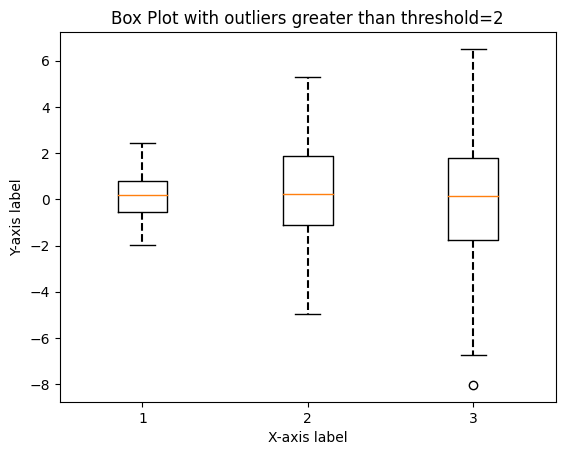

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# generate some data
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# define a function to identify outliers based on a threshold
def is_outlier(points, threshold=3):
    return points > threshold

# create the box plot and define the whisker properties
bp = plt.boxplot(data, whiskerprops=dict(color='black', linestyle='--', linewidth=1.5))

# identify and mark the outliers based on the custom function
#for i, points in enumerate(data):
 #   outliers = is_outlier(points)
  #  bp['fliers'][i].set(markerfacecolor='red', marker='o', markersize=8, alpha=0.5)
   # bp['fliers'][i].set_ydata(points[outliers])

# set the axis labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Box Plot with outliers greater than threshold=2')

# show the plot
plt.show()


In [ ]:

print("Level_1 statistics: ", dataset_reddit.level_1.value_counts(), "\n") 
print("Level_2 statistics: ", dataset_reddit.level_2.value_counts(), "\n") 
print("Level_3 statistics: ", dataset_reddit.level_3.value_counts(), "\n") 

Level_1 statistics:  Nonmisogynistic    5868
Misogynistic        699
Name: level_1, dtype: int64 

Level_2 statistics:  None_of_the_categories             5815
Derogation                          285
Misogynistic_pejorative             276
Treatment                           103
Nonmisogynistic_personal_attack      43
Misogynistic_personal_attack         35
Counter_speech                       10
Name: level_2, dtype: int64 

Level_3 statistics:  Moral_inferiority                               148
Other                                            79
Gender_of_recipient_is_Female                    64
Disrespectful_actions_Seduction_and_conquest     43
Intellectual_inferiority                         32
Sexual_or_physical_limitations                   26
Disrespectful_actions_Controlling                17
Disrespectful_actions_Manipulation               16
Threatening_Physical_violence                    13
Gender_of_recipient_is_Male                      10
Disrespectful_actions_Other  

In [ ]:
dataset_ami = pd.read_csv('./AMI2018_ELG/en_training_anon.tsv', sep='\t', encoding='utf-8')  
print("Attributes in the AMI dataset: ", dataset_ami.columns) 

Attributes in the AMI dataset:  Index(['id', 'text', 'misogynous', 'misogyny_category', 'target'], dtype='object')


In [ ]:
print("Misogynous column statistics:\n", dataset_ami.misogynous.value_counts(), "\n")

Misogynous column statistics:
 0    2215
1    1785
Name: misogynous, dtype: int64 



In [ ]:
dataset_reddit.describe()

,entry_utc,week,group
count,6.567000e+03,6567.000000,6567.000000
mean,1.585821e+09,6.999695,1.476473
std,4.594872e+06,3.039941,0.499484
min,1.499382e+09,1.000000,1.000000
25%,1.583044e+09,4.000000,1.000000
50%,1.587569e+09,8.000000,1.000000
75%,1.588780e+09,10.000000,2.000000
max,1.589862e+09,11.000000,2.000000


In [ ]:
l = [] 
for i in list(dataset_reddit.body):
  l.append(len(str(i)))



In [ ]:
sum(l)/len(l)

367.2448606669712

In [ ]:
max(l)

18148